*** INTRODUCTION***

The code constructs K_means clustering algorithm to processes the field reflectance data.The code interpolates the 1nm reflectance to 10nm
 computes derivatives, and construct k_means model for field data.
 The objective of the project is to partition agricultural field reflectance data taken at random into its original group.


 ***Credits: Mohammed Braimah, September 2023***


In [1]:

##we are importing operational packages

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

##we are importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Mounted at /content/gdrive


***We want to load the excel book and call each worksheet.
This saves us time from saving each worksheet seperately as a .csv file***

In [2]:

ZachA_LynnW = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/042623_HWHF_10d_1_1.xlsx')
ZachA_15_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA_15_Weeds')
ZachA_15_Soil = pd.read_excel(ZachA_LynnW, 'ZachA15_Soil')
ZachA_14_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA_14_Weeds')
ZachA_14_Soil = pd.read_excel(ZachA_LynnW, 'ZachA14_Soil')
ZachA_13_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA13_Weeds')
ZachA_13_Soil = pd.read_excel(ZachA_LynnW, 'ZachA13_10D_Soil')
ZachA_12_Wheat = pd.read_excel(ZachA_LynnW, 'ZachA12_Wheat')
ZachA_12_Road = pd.read_excel(ZachA_LynnW, 'ZachA12_Road')
ZachA_11_Wheat = pd.read_excel(ZachA_LynnW, 'ZackA_11_Wheat')
ZachA_11_Soil = pd.read_excel(ZachA_LynnW, 'ZachA11_Soil')
LynnW05_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW05_Cornres')
LynnW05_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW05_Bare_Soil')
LynnW04_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW04_Cornres')
LynnW04_Soil = pd.read_excel(ZachA_LynnW, '042623LynnW04_Bare_SOil')
LynnW03_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW03_Cornres')
LynnW03_Soil = pd.read_excel(ZachA_LynnW, '042623LynnW_03_Bare_Soil')
LynnW02_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW02_Cornres')
LynnW02_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW02_Bare_Soil')
LynnW01_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW01_Cornres')
LynnW01_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW01_Bare_Soil')

SK_farms = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/052423_HWHF_10d_1.xlsx')
SK_5_Soil = pd.read_excel(SK_farms, '052423_SK_5_Soil')
SK_5_Grass = pd.read_excel(SK_farms, '052423_SK_5_Grass')
SK_4_Soil = pd.read_excel(SK_farms, '052423_SK_4_Soil')
SK_4_Grass = pd.read_excel(SK_farms, '052423_SK_4_Grass')
SK_3_Soil = pd.read_excel(SK_farms, '052423_SK_3_Soil')
SK_3_Grass = pd.read_excel(SK_farms, '052423_SK_3_Grass')
SK_2_Soil = pd.read_excel(SK_farms, '052423_SK_2_Soil')
SK_2_Grass = pd.read_excel(SK_farms, '052423_SK_2_Grass')
SK_1_Soil = pd.read_excel(SK_farms, '052423_SK_1_Soil')
SK_1_Grass = pd.read_excel(SK_farms, '052423_SK_1_Grass')

KB_farms = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/052223_HWHF_10d_1.xlsx')
KB_5_Wheat = pd.read_excel(KB_farms, '52223_KB5_Wheat')
KB_5_Soil = pd.read_excel(KB_farms, '052223_KB5_Soil')
KB_5_Drying_Wheat = pd.read_excel(KB_farms, '052223_KB5_Drying_Wheat')
KB_5_Corn_Res = pd.read_excel(KB_farms, '052223_KB5_Corn_Res')
KB_4_Soil = pd.read_excel(KB_farms, '052223_KB4_Soil')
KB_4_Dry_Rye = pd.read_excel(KB_farms, '052223_KB4_Dry_Rye')
KB_4_Corn_Res = pd.read_excel(KB_farms, '052223_KB4_Corn_Res')
KB_3_Soil = pd.read_excel(KB_farms, '052223_KB3_Soil')
KB_3_Corn_Res = pd.read_excel(KB_farms, '052223_KB_3_Corn_Res')
KB_1_Soil = pd.read_excel(KB_farms, '052223_KB1_Soil')
KB_1_Corn_Res = pd.read_excel(KB_farms, '052223_KB1_Corn_Res')
JB_5_Soil = pd.read_excel(KB_farms, '052223_JB5_Soil')
JB_5_Corn_Res = pd.read_excel(KB_farms, '052223_JB5_Corn_Res')
JB_4_Soil = pd.read_excel(KB_farms, '052223_JB4_Soil')
JB_4_Corn_Res = pd.read_excel(KB_farms, '052223_JB4_CorenRes')
JB_3_Soil = pd.read_excel(KB_farms, '052223_JB3_Soil')
JB_3_Corn_Res = pd.read_excel(KB_farms, '052223_JB3_Corn_Residue')
JB_2_Soil = pd.read_excel(KB_farms, '052223_JB2_Soil')
JB_2_Corn_Res = pd.read_excel(KB_farms, '052223_JB2_Corn_Residue')
JB_1_Soil = pd.read_excel(KB_farms, '052223_JB1_Soil')
JB_1_Corn_Res = pd.read_excel(KB_farms, '052223_JB1_CornRes')
JB_1_Soya_Bean = pd.read_excel(KB_farms, '052223_JB1_Soya_Bean')
JB_Grass_Filt = pd.read_excel(KB_farms, '052223_JB_Grass_Filt')
JB_0_Road = pd.read_excel(KB_farms, '052223_JB0_Road')

JanD_farms = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/041923_HWHF_10d_1_1.xlsx')
JanD_S10_Weeds = pd.read_excel(JanD_farms, '041923_JanDS10_Weeds')
JanD_S9_Weeds = pd.read_excel(JanD_farms, '041923_JanDS09_Weeds')
JanD_S9_Corn_Res = pd.read_excel(JanD_farms, '041923_JanDS09_Cornres')
JanD_S8_Corn_Res = pd.read_excel(JanD_farms, '041923_JanDS08_Cornres')
JanD_S8_Bare_Soil = pd.read_excel(JanD_farms, '041923JanDS08_Baresoil')
JanD_S6_Weed = pd.read_excel(JanD_farms, '041923_JanDS06_Weed')
JanD_S6_Weed_2 = pd.read_excel(JanD_farms, '041923_JanDS06_Weed2')
JanD_S6_Weed_3 = pd.read_excel(JanD_farms, '041923_JanDS06_Weed3')
JanD_S6_Bare_Soil = pd.read_excel(JanD_farms, '041923_JanDS06_Baresoil')
JanD_S6_Corn_Redw = pd.read_excel(JanD_farms, '041923JanDS06_Corn_Redw')




***This function calculates the mean avaerage reflectance of the sample and multiplies it by 100***

In [3]:


def mean_reflectance (sample):
  sample["Mean Reflectance"] = sample.drop('Wavelength', axis=1).mean(axis=1)*100
  return sample["Mean Reflectance"]

***We want to  plot the average reflectance
for 1nm wavelength. This was plotted after the atmospheric corrections
had been done in excel
The plot takes on the mean_reflectance function of each sample and plot it against the 1nm wavelength***

***This function performs the interpolation at 10nm and calculates the derivative spectra***

In [4]:

def derivative(sample):

  ## we convert the mean reflectance and wavelength at 1nm  to numpy arrays
  Wavelength_np = np.array(sample["Wavelength"])

  #we apply the mean_reflectance function on the sample and convert it to numpy arrays
  Reflectance_np= np.array( mean_reflectance (sample))

  ##we tell python to give us values from 350 t0 2500, in intervals of 10
  xvals = np.array(range(350, 2501, 10))

  ##we are performing the interpolation at 10nm using the intervals, wavelength, and reflecatnace
  interp_10nm = np.interp(xvals,Wavelength_np, Reflectance_np)

  ## we want to claculate the derivative using the gradient function dydx = np.gradient(y,x)

  derivative = np.gradient( interp_10nm , xvals, edge_order=2)

  return derivative

***we want to execute the derivative function on each sample
to get the derivative spectra of each sample***

In [5]:

SK_5_Soil_derivative = derivative(SK_5_Soil)
SK_5_Grass_derivative = derivative(SK_5_Grass)
SK_4_Soil_derivative = derivative(SK_4_Soil)
SK_4_Grass_derivative = derivative( SK_4_Grass)
SK_3_Soil_derivative = derivative(SK_3_Soil)
SK_3_Grass_derivative = derivative(SK_3_Grass)
SK_2_Soil_derivative = derivative(SK_2_Soil)
SK_2_Grass_derivative = derivative(SK_2_Grass)
SK_1_Soil_derivative = derivative (SK_1_Soil)
SK_1_Grass_derivative = derivative (SK_1_Grass)

KB_5_Soil_derivative = derivative (KB_5_Soil)
KB_5_Wheat_derivative = derivative (KB_5_Wheat)
KB_5_Drying_Wheat_derivative = derivative(KB_5_Drying_Wheat)
KB_5_Corn_Res_derivative = derivative(KB_5_Corn_Res)
KB_4_Dry_Rye_derivative = derivative (KB_4_Dry_Rye)
KB_4_Soil_derivative = derivative (KB_4_Soil)
KB_3_Corn_Res_derivative = derivative (KB_3_Corn_Res)
KB_3_Soil_derivative = derivative (KB_3_Soil)
KB_1_Corn_Res_derivative = derivative (KB_1_Corn_Res)
KB_1_Soil_derivative = derivative (KB_1_Soil)

JB_5_Soil_derivative = derivative(JB_5_Soil)
JB_5_Corn_Res_derivative = derivative(JB_5_Corn_Res)
JB_4_Soil_derivative = derivative (JB_4_Soil)
JB_4_Corn_Res_derivative = derivative (JB_4_Corn_Res)
JB_3_Soil_derivative = derivative (JB_3_Soil)
JB_3_Corn_Res_derivative = derivative (JB_3_Corn_Res)
JB_2_Soil_derivative = derivative (JB_2_Soil)
JB_2_Corn_Res_derivative = derivative (JB_2_Corn_Res)
JB_1_Soil_derivative = derivative (JB_1_Soil)
JB_1_Corn_Res_derivative = derivative (JB_1_Corn_Res)
JB_1_Soya_Bean_derivative = derivative (JB_1_Soya_Bean)
JB_0_Road_derivative = derivative (JB_0_Road)
JB_Grass_Filt_derivative = derivative (JB_Grass_Filt)

JanD_S10_Weeds_derivative = derivative(JanD_S10_Weeds)
JanD_S9_Weeds_derivative = derivative(JanD_S9_Weeds)
JanD_S9_Corn_Res_derivative = derivative(JanD_S9_Corn_Res)

JanD_S8_Corn_Res_derivative = derivative (JanD_S8_Corn_Res)
JanD_S8_Bare_Soil_derivative = derivative (JanD_S8_Bare_Soil)
JanD_S6_Weed_derivative = derivative (JanD_S6_Weed)
JanD_S6_Weed_2_derivative = derivative (JanD_S6_Weed_2)
JanD_S6_Weed_3_derivative = derivative (JanD_S6_Weed_3)
JanD_S6_Corn_Rewd_derivative = derivative (JanD_S6_Corn_Redw )

ZachA_15_Weeds_derivative = derivative(ZachA_15_Weeds)
ZachA_15_Soil_derivative = derivative(ZachA_15_Soil)
ZachA_14_Soil_derivative = derivative(ZachA_14_Soil)
ZachA_14_Weeds_derivative = derivative(ZachA_14_Weeds)
ZachA_13_Weeds_derivative = derivative(ZachA_13_Weeds)
ZachA_13_Soil_derivative = derivative (ZachA_13_Soil)
ZachA_12_Wheat_derivative = derivative (ZachA_12_Wheat)
ZachA_12_Road_derivative = derivative (ZachA_12_Road)
ZachA_11_Wheat_derivative = derivative(ZachA_11_Wheat)
ZachA_11_Soil_derivative = derivative(ZachA_11_Soil)


LynnW_05_CornRes_derivative = derivative(LynnW05_CornRes)
LynnW_05_Soil_derivative = derivative (LynnW05_Soil)
LynnW_04_CornRes_derivative = derivative (LynnW04_CornRes)
LynnW_04_Soil_derivative = derivative(LynnW04_Soil)
LynnW_03_CornRes_derivative = derivative(LynnW03_CornRes)
LynnW_03_Soil_derivative = derivative (LynnW03_Soil)
LynnW_02_CornRes_derivative = derivative (LynnW02_CornRes)
LynnW_02_Soil_derivative = derivative(LynnW02_Soil)
LynnW_01_CornRes_derivative = derivative(LynnW01_CornRes)
LynnW_01_Soil_derivative = derivative (LynnW01_Soil)



***We want to make a dataframe of all derivatives of each sample from each site***

In [8]:

xvals_10nm = np.array(range(350, 2501, 10))
derivative_spring_2023 = pd.DataFrame({'Wavelength':xvals_10nm,
                                       'ZachA_15_Weeds_derivative': ZachA_15_Weeds_derivative,
                                       'ZachA_15_Soil_derivative': ZachA_15_Soil_derivative,
                                       'ZachA_14_Weeds_derivative': ZachA_14_Weeds_derivative,
                                       'ZachA_14_Soil_derivative':ZachA_14_Soil_derivative,
                                       'ZachA_13_Weeds_derivative':ZachA_13_Weeds_derivative,
                                       'ZachA_13_Soil_derivative': ZachA_13_Soil_derivative,
                                       'ZachA_12_Wheat_derivative ':ZachA_12_Wheat_derivative ,
                                       'ZachA_12_Road_derivative': ZachA_12_Road_derivative,
                                      #  'ZachA_11_Wheat_derivative':ZachA_11_Wheat_derivative,
                                       'ZachA_11_Soil_derivative': ZachA_11_Soil_derivative,
                                       'LynnW_05_CornRes_derivative': LynnW_05_CornRes_derivative,
                                       'LynnW_05_Soil_derivative': LynnW_05_Soil_derivative,
                                       'LynnW_04_CornRes_derivative ': LynnW_04_CornRes_derivative ,
                                       'LynnW_04_Soil_derivative ': LynnW_04_Soil_derivative,
                                       'LynnW_03_CornRes_derivative ': LynnW_03_CornRes_derivative,
                                       'LynnW_03_Soil_derivative':LynnW_03_Soil_derivative,
                                       'LynnW_02_CornRes_derivative ': LynnW_02_CornRes_derivative,
                                       'LynnW_02_Soil_derivative':LynnW_02_Soil_derivative,
                                       'LynnW_01_CornRes_derivative ': LynnW_01_CornRes_derivative,
                                       'LynnW_01_Soil_derivative': LynnW_01_Soil_derivative,
                                       'SK_5_Soil_derivative': SK_5_Soil_derivative,
                                       'SK_5_Grass_derivative': SK_5_Grass_derivative,
                                       'SK_4_Soil_derivative ': SK_4_Soil_derivative,
                                       'SK_4_Grass_derivative': SK_4_Grass_derivative,
                                       'SK_3_Soil_derivative' : SK_3_Soil_derivative,
                                       'SK_3_Grass_derivative': SK_3_Grass_derivative,
                                       'SK_2_Soil_derivative': SK_2_Soil_derivative,
                                       'SK_2_Grass_derivative': SK_2_Grass_derivative,
                                       'SK_1_Soil_derivative ':SK_1_Soil_derivative,
                                       'SK_1_Grass_derivative': SK_1_Grass_derivative,
                                       'KB_5_Soil_derivative':  KB_5_Soil_derivative,
                                       'KB_5_Wheat_derivative': KB_5_Wheat_derivative,
                                       'KB_5_Drying_Wheat_derivative': KB_5_Drying_Wheat_derivative,
                                       'KB_5_Corn_Res_derivative ': KB_5_Corn_Res_derivative,
                                       'KB_4_Dry_Rye_derivative': KB_4_Dry_Rye_derivative,
                                       'KB_4_Soil_derivative': KB_4_Soil_derivative,
                                       'KB_3_Corn_Res_derivative ': KB_3_Corn_Res_derivative,
                                       'KB_3_Soil_derivative': KB_3_Soil_derivative,
                                       'KB_1_Corn_Res_derivative' : KB_1_Corn_Res_derivative,
                                       'KB_1_Soil_derivative': KB_1_Soil_derivative,
                                       'JB_5_Soil_derivative': JB_5_Soil_derivative,
                                       'JB_5_Corn_Res_derivative': JB_5_Corn_Res_derivative,
                                       'JB_4_Soil_derivative': JB_4_Soil_derivative,
                                       'JB_4_Corn_Res_derivative': JB_4_Corn_Res_derivative,
                                       'JB_3_Soil_derivative': JB_3_Soil_derivative,
                                       'JB_3_Corn_Res_derivative': JB_3_Corn_Res_derivative,
                                       'JB_2_Soil_derivative': JB_2_Soil_derivative,
                                       'JB_2_Corn_Res_derivative': JB_2_Corn_Res_derivative,
                                       'JB_1_Soil_derivative': JB_1_Soil_derivative,
                                       'JB_1_Corn_Res_derivative': JB_1_Corn_Res_derivative,
                                       'JB_1_Soya_Bean_derivative': JB_1_Soya_Bean_derivative,
                                       'JB_0_Road_derivative': JB_0_Road_derivative,
                                       'JB_Grass_Filt_derivative': JB_Grass_Filt_derivative,
                                       'JanD_S10_Weeds_derivative': JanD_S10_Weeds_derivative,
                                       'JanD_S9_Weeds_derivative': JanD_S9_Weeds_derivative,
                                       'JanD_S9_Corn_Res_derivative': JanD_S9_Corn_Res_derivative,
                                       'JanD_S8_Corn_Res_derivative': JanD_S8_Corn_Res_derivative,
                                       'JanD_S8_Bare_Soil_derivative': JanD_S8_Bare_Soil_derivative,
                                       'JanD_S6_Weed_derivative': JanD_S6_Weed_derivative,
                                       'JanD_S6_Weed_2_derivative ': JanD_S6_Weed_2_derivative,
                                       'JanD_S6_Weed_3_derivative ': JanD_S6_Weed_3_derivative,
                                       'JanD_S6_Corn_Rewd_derivative': JanD_S6_Corn_Rewd_derivative
                                       } )

***We want to plot the derivative spectra***

Text(0.5, 0, 'Wavelength (nm)')

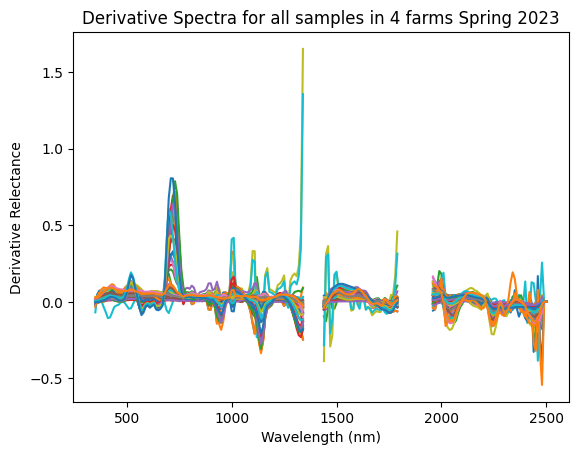

In [9]:

derivative_spring_2023.plot(x="Wavelength", y=['ZachA_15_Weeds_derivative',
                                        'ZachA_15_Weeds_derivative',
                                       'ZachA_15_Soil_derivative',
                                       'ZachA_14_Weeds_derivative',
                                       'ZachA_14_Soil_derivative',
                                       'ZachA_13_Weeds_derivative',
                                       'ZachA_13_Soil_derivative',
                                       'ZachA_12_Wheat_derivative ',
                                       'ZachA_12_Road_derivative',
                                      #  'ZachA_11_Wheat_derivative',
                                       'ZachA_11_Soil_derivative',
                                       'LynnW_05_CornRes_derivative',
                                       'LynnW_05_Soil_derivative',
                                       'LynnW_04_CornRes_derivative ' ,
                                       'LynnW_04_Soil_derivative ',
                                       'LynnW_03_CornRes_derivative ',
                                       'LynnW_03_Soil_derivative',
                                       'LynnW_02_CornRes_derivative ',
                                       'LynnW_02_Soil_derivative',
                                       'LynnW_01_CornRes_derivative ',
                                       'LynnW_01_Soil_derivative',
                                       'SK_5_Soil_derivative',
                                       'SK_5_Grass_derivative',
                                       'SK_4_Soil_derivative ',
                                       'SK_4_Grass_derivative',
                                       'SK_3_Soil_derivative' ,
                                       'SK_3_Grass_derivative',
                                       'SK_2_Soil_derivative',
                                       'SK_2_Grass_derivative',
                                       'SK_1_Soil_derivative ',
                                       'SK_1_Grass_derivative',
                                       'KB_5_Soil_derivative',
                                       'KB_5_Wheat_derivative',
                                       'KB_5_Drying_Wheat_derivative',
                                       'KB_5_Corn_Res_derivative ',
                                       'KB_4_Dry_Rye_derivative',
                                       'KB_4_Soil_derivative',
                                       'KB_3_Corn_Res_derivative ',
                                       'KB_3_Soil_derivative',
                                       'KB_1_Corn_Res_derivative',
                                       'KB_1_Soil_derivative',
                                       'JB_5_Soil_derivative',
                                       'JB_5_Corn_Res_derivative',
                                       'JB_4_Soil_derivative',
                                       'JB_4_Corn_Res_derivative',
                                       'JB_3_Soil_derivative',
                                       'JB_3_Corn_Res_derivative',
                                       'JB_2_Soil_derivative',
                                       'JB_2_Corn_Res_derivative',
                                       'JB_1_Soil_derivative',
                                       'JB_1_Corn_Res_derivative',
                                       'JB_1_Soya_Bean_derivative',
                                       'JB_0_Road_derivative',
                                       'JB_Grass_Filt_derivative',
                                       'JanD_S10_Weeds_derivative',
                                       'JanD_S9_Weeds_derivative',
                                       'JanD_S9_Corn_Res_derivative',
                                       'JanD_S8_Corn_Res_derivative',
                                       'JanD_S8_Bare_Soil_derivative',
                                       'JanD_S6_Weed_derivative',
                                       'JanD_S6_Weed_2_derivative ',
                                       'JanD_S6_Weed_3_derivative ',
                                       'JanD_S6_Corn_Rewd_derivative'



])
plt.gca().get_legend().remove()
plt.title("Derivative Spectra for all samples in 4 farms Spring 2023")
plt.ylabel("Derivative Relectance")
plt.xlabel("Wavelength (nm)")

***We want to explore the derivative spectra***

In [10]:
''' we want to show the first 10 rows of the derivative spectra
'''
derivative_spring_2023.head(10)

,Wavelength,ZachA_15_Weeds_derivative,ZachA_15_Soil_derivative,ZachA_14_Weeds_derivative,ZachA_14_Soil_derivative,ZachA_13_Weeds_derivative,ZachA_13_Soil_derivative,ZachA_12_Wheat_derivative,ZachA_12_Road_derivative,ZachA_11_Soil_derivative,...,JB_Grass_Filt_derivative,JanD_S10_Weeds_derivative,JanD_S9_Weeds_derivative,JanD_S9_Corn_Res_derivative,JanD_S8_Corn_Res_derivative,JanD_S8_Bare_Soil_derivative,JanD_S6_Weed_derivative,JanD_S6_Weed_2_derivative,JanD_S6_Weed_3_derivative,JanD_S6_Corn_Rewd_derivative
0,350,-0.003259,0.008077,0.000489,0.006545,-0.006032,-0.003312,-0.003193,-0.002520,-0.068786,...,0.001046,0.000355,-0.002034,0.015397,0.018182,0.006227,0.000077,0.004501,-0.003099,0.027407
1,360,0.001130,0.016511,-0.000905,0.009922,0.001336,0.005548,-0.004304,-0.003252,0.050092,...,0.000655,-0.000114,-0.001922,0.015835,0.025630,0.011087,0.004254,0.005968,-0.001938,0.027469
2,370,0.007323,0.029494,0.003313,0.021173,0.007999,0.016265,-0.001632,-0.000358,0.072413,...,0.001270,0.002433,0.000505,0.021610,0.036030,0.017038,0.009517,0.010643,0.000945,0.036500
3,380,0.015395,0.046133,0.012361,0.037760,0.015365,0.027891,0.003418,0.006733,0.001749,...,0.002999,0.007773,0.005321,0.033741,0.049793,0.024446,0.017354,0.018288,0.005951,0.053000
4,390,0.023278,0.053879,0.017802,0.042840,0.022536,0.033465,0.006135,0.012706,-0.034330,...,0.006464,0.011775,0.009192,0.044052,0.062290,0.029088,0.024874,0.024842,0.010057,0.066667
5,400,0.033142,0.050415,0.025602,0.039731,0.027663,0.030971,0.011532,0.024991,-0.068357,...,0.013527,0.015867,0.012862,0.049970,0.074247,0.030582,0.029373,0.031137,0.015360,0.076424
6,410,0.049315,0.052549,0.041659,0.043123,0.036921,0.032339,0.021660,0.049590,-0.106210,...,0.020358,0.020900,0.017343,0.056543,0.090426,0.034131,0.032634,0.039217,0.024278,0.085977
7,420,0.060517,0.063444,0.049392,0.053473,0.044197,0.041027,0.028394,0.056959,-0.102119,...,0.021061,0.024145,0.019898,0.061556,0.101771,0.038121,0.032274,0.042919,0.031338,0.093326
8,430,0.053286,0.070526,0.039808,0.061577,0.040209,0.046623,0.025096,0.036639,-0.069308,...,0.015113,0.023305,0.018103,0.059661,0.102434,0.039989,0.026862,0.038704,0.030895,0.091173
9,440,0.036665,0.061641,0.024979,0.055165,0.030056,0.040384,0.017363,0.014928,-0.034183,...,0.009292,0.020258,0.014636,0.054146,0.097762,0.039100,0.023949,0.036005,0.027547,0.084118


In [11]:
''' we want to export our result to excel
'''
derivative_spring_2023.to_excel("spring_2023_Derivatives.xlsx")

In [12]:
''' we want to add drdl to the wavelength to make it a string
'''
derivative_spring_2023['Wavelength'] = 'drdl' + derivative_spring_2023['Wavelength']. astype (str)



*** We want to study the visible spectrum: 400nm to 750nm***

In [13]:
''' we want to select the visible spectrum 350nm to 750nm
'''
derivative_spring_2023_visible = derivative_spring_2023[5:41]

In [14]:
''' we transpose the visible spectra'''
visible_Transpose = derivative_spring_2023_visible.set_index('Wavelength').T

In [15]:
visible_Transpose

Wavelength,drdl400,drdl410,drdl420,drdl430,drdl440,drdl450,drdl460,drdl470,drdl480,drdl490,...,drdl660,drdl670,drdl680,drdl690,drdl700,drdl710,drdl720,drdl730,drdl740,drdl750
ZachA_15_Weeds_derivative,0.033142,0.049315,0.060517,0.053286,0.036665,0.021573,0.012216,0.010139,0.013711,0.023655,...,-0.017629,-0.005724,0.047690,0.210091,0.388365,0.431817,0.476718,0.511578,0.376952,0.231014
ZachA_15_Soil_derivative,0.050415,0.052549,0.063444,0.070526,0.061641,0.039523,0.026286,0.029699,0.045046,0.061721,...,0.031336,0.029304,0.031362,0.038502,0.045218,0.037254,0.038004,0.050544,0.045990,0.018447
ZachA_14_Weeds_derivative,0.025602,0.041659,0.049392,0.039808,0.024979,0.013688,0.008778,0.008526,0.012041,0.019958,...,-0.006959,0.000286,0.036966,0.135667,0.229316,0.242855,0.239688,0.219386,0.148791,0.112576
ZachA_14_Soil_derivative,0.039731,0.043123,0.053473,0.061577,0.055165,0.035824,0.023408,0.026540,0.041049,0.057429,...,0.033151,0.032658,0.033153,0.037331,0.040565,0.038288,0.038662,0.040857,0.036824,0.035309
ZachA_13_Weeds_derivative,0.027663,0.036921,0.044197,0.040209,0.030056,0.018493,0.010738,0.010153,0.014788,0.024299,...,-0.018272,-0.005731,0.054166,0.210329,0.359771,0.390993,0.410520,0.407491,0.295011,0.151153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JanD_S8_Bare_Soil_derivative,0.030582,0.034131,0.038121,0.039989,0.039100,0.034807,0.031581,0.031667,0.034165,0.036781,...,0.034554,0.035396,0.047730,0.055368,0.049067,0.040641,0.037925,0.037696,0.035114,0.033747
JanD_S6_Weed_derivative,0.029373,0.032634,0.032274,0.026862,0.023949,0.022855,0.019275,0.017458,0.019100,0.028023,...,-0.022744,-0.009456,0.065115,0.250321,0.410869,0.433789,0.414018,0.346962,0.225934,0.121845
JanD_S6_Weed_2_derivative,0.031137,0.039217,0.042919,0.038704,0.036005,0.033885,0.027942,0.024916,0.029767,0.045887,...,-0.044539,-0.023505,0.111822,0.402615,0.607601,0.565428,0.431272,0.275602,0.145312,0.072206
JanD_S6_Weed_3_derivative,0.015360,0.024278,0.031338,0.030895,0.027547,0.021950,0.012787,0.008870,0.011560,0.023436,...,-0.046223,-0.025175,0.082323,0.366737,0.675439,0.806996,0.805447,0.644746,0.382398,0.185436


***We are begining the machine learning by cluster centres using K means***

In [16]:
#We are assigning the visible spectrum to a variable called X. Remember we have set the wavelength column as index.
# The transposed matrix has wavelengths as column headings
X = visible_Transpose

In [17]:
#We want to scaled the data and save it to variable `X_scaled`.

X_scaled = StandardScaler().fit_transform(X)

***This Function is used to find an optimized cluster Centres. The Inertia which measures the squared distances of the intra-cluster distances are applied***

In [18]:
# We fit K-means and evaluate inertia for different values of k.
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

#model = KMeans.fit(X_scaled, k=2, random_state = 42)

In [20]:
# We return a list of inertia for k=2 to 10.

inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[1119.4274080899474,
 686.3998753532564,
 561.5194088077831,
 459.657973531635,
 385.7477656091065,
 312.2840919337214,
 254.78195976391433,
 223.84715083006537,
 193.8673331671447]

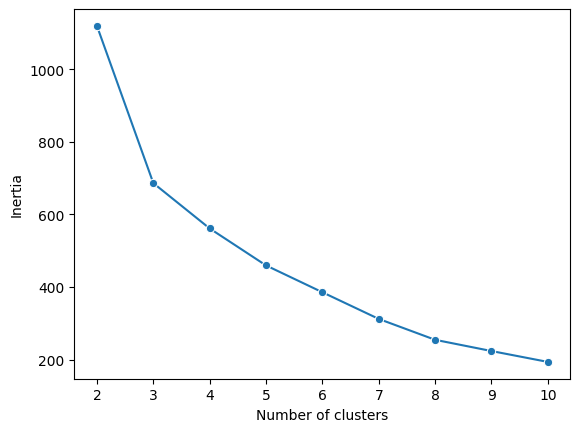

In [21]:
#We want to plot the intertia curve
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

Wow!, The elbow of the intertia curves is around 3 cluster centres

***We want to use the Silhouette Score hyperparater to verfiy the the cluster centres. We do so by creating a function to calculate the silhouette scores***

In [22]:
# We write a function to return a list of each k-value's score.
def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value.
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.4464338348289192,
 0.4109016469762613,
 0.386425759435255,
 0.37264752654433264,
 0.34359853230977716,
 0.34333402600236845,
 0.35331089617628436,
 0.356947808104194,
 0.34488137065977137]

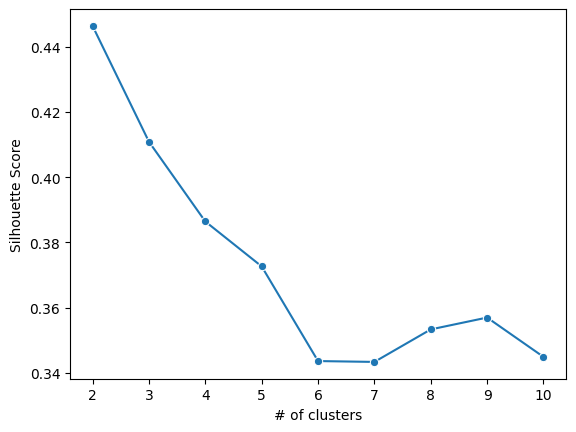

In [23]:
# Create a line plot for the silhouette score.


plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

Congratulatings to us. We find that the optimal value of the Silhoutte score is 3. So we have 3 cluster centres

*** We now create the model with 3 cluster centres, and fit it to our X_scaled data***

In [24]:
# Fit a 3-cluster model.

model3 = KMeans(n_clusters = 3, random_state = 42)
model3.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [25]:
#We can now print the unique labels
print("Unique labels: ", np.unique(model3.labels_))

Unique labels:  [0 1 2]


*** Now, Lets add a new column called clusters to our derivative reflectanceand get the sizes of each cluster***

In [26]:

visible_Transpose['cluster'] = model3.labels_

In [27]:
 #We want to verify the size of the cluster`.

visible_Transpose.groupby(by = ['cluster']).size()

cluster
0    22
1    23
2    16
dtype: int64

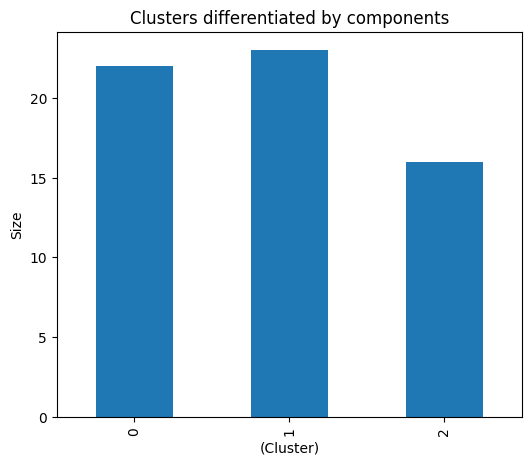

In [28]:
#We want to plot the sizes of the cluster centers
visible_Transpose.groupby(by=['cluster']).size().plot.bar(title='Clusters differentiated by components',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster)');

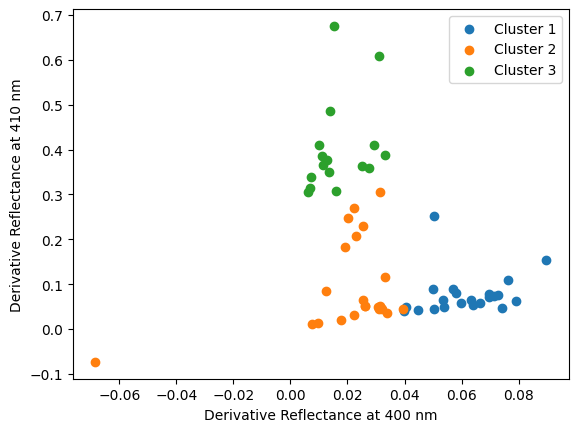

In [31]:
for i in np.unique(model3.labels_):
  plt.scatter(visible_Transpose[visible_Transpose['cluster'] == i]['drdl400' ],visible_Transpose[visible_Transpose['cluster'] == i]['drdl700' ] )
  #plt.scatter(components['cluster' == i, 1], components['cluster' == i, 2], cluster = i) # idf[label == i , 0] , df[label == i , 1] , label = i)
plt.xlabel('Derivative Reflectance at 400 nm')
plt.ylabel('Derivative Reflectance at 410 nm')
plt.legend(labels = ['Cluster 1', 'Cluster 2', 'Cluster 3' ])
plt.show()

In [32]:
Cluster_1 = visible_Transpose[visible_Transpose['cluster']==0]

In [33]:
Cluster_1

Wavelength,drdl400,drdl410,drdl420,drdl430,drdl440,drdl450,drdl460,drdl470,drdl480,drdl490,...,drdl670,drdl680,drdl690,drdl700,drdl710,drdl720,drdl730,drdl740,drdl750,cluster
ZachA_15_Soil_derivative,0.050415,0.052549,0.063444,0.070526,0.061641,0.039523,0.026286,0.029699,0.045046,0.061721,...,0.029304,0.031362,0.038502,0.045218,0.037254,0.038004,0.050544,0.045990,0.018447,0
ZachA_14_Soil_derivative,0.039731,0.043123,0.053473,0.061577,0.055165,0.035824,0.023408,0.026540,0.041049,0.057429,...,0.032658,0.033153,0.037331,0.040565,0.038288,0.038662,0.040857,0.036824,0.035309,0
LynnW_04_CornRes_derivative,0.064177,0.072569,0.083678,0.085859,0.079430,0.069330,0.064204,0.063801,0.064864,0.065863,...,0.056318,0.064167,0.065296,0.052959,0.062044,0.058907,0.033530,0.036278,0.062170,0
LynnW_03_CornRes_derivative,0.053738,0.062272,0.071367,0.071130,0.065149,0.059432,0.056749,0.055048,0.054718,0.054230,...,0.047434,0.047649,0.047794,0.048979,0.041072,0.040379,0.050502,0.048037,0.028720,0
LynnW_01_CornRes_derivative,0.078998,0.082085,0.095549,0.098564,0.089842,0.077357,0.072226,0.072604,0.078091,0.079467,...,0.050003,0.068976,0.073496,0.063223,0.071442,0.066552,0.046644,0.047353,0.016216,0
LynnW_01_Soil_derivative,0.057073,0.056733,0.069169,0.077181,0.069167,0.048845,0.037081,0.039708,0.053580,0.066934,...,0.022126,0.073298,0.107149,0.088434,0.070502,0.060111,0.047433,0.045646,0.026014,0
KB_5_Corn_Res_derivative,0.066456,0.078421,0.088989,0.088128,0.080540,0.073650,0.069837,0.066943,0.065636,0.064747,...,0.057913,0.058281,0.059085,0.058372,0.053088,0.049328,0.049053,0.045161,0.041505,0
KB_3_Corn_Res_derivative,0.059814,0.068409,0.076390,0.075426,0.069583,0.065205,0.063380,0.061825,0.061372,0.060886,...,0.059966,0.061286,0.059806,0.058023,0.055591,0.053237,0.053618,0.050920,0.049533,0
KB_3_Soil_derivative,0.040655,0.042687,0.049223,0.053477,0.050635,0.042426,0.036776,0.036684,0.041796,0.048346,...,0.049671,0.052526,0.051677,0.048544,0.049034,0.047240,0.042747,0.041760,0.046547,0
KB_1_Corn_Res_derivative,0.063222,0.072696,0.081069,0.079575,0.073594,0.068309,0.065448,0.063611,0.062730,0.061920,...,0.061306,0.063864,0.065024,0.064693,0.059442,0.056807,0.061452,0.056431,0.051310,0


In [34]:
Cluster_2 = visible_Transpose[visible_Transpose['cluster']==1]
Cluster_2

Wavelength,drdl400,drdl410,drdl420,drdl430,drdl440,drdl450,drdl460,drdl470,drdl480,drdl490,...,drdl670,drdl680,drdl690,drdl700,drdl710,drdl720,drdl730,drdl740,drdl750,cluster
ZachA_14_Weeds_derivative,0.025602,0.041659,0.049392,0.039808,0.024979,0.013688,0.008778,0.008526,0.012041,0.019958,...,0.000286,0.036966,0.135667,0.229316,0.242855,0.239688,0.219386,0.148791,0.112576,1
ZachA_13_Soil_derivative,0.030971,0.032339,0.041027,0.046623,0.040384,0.023889,0.013493,0.016521,0.028423,0.041638,...,0.021285,0.027333,0.038053,0.045154,0.045264,0.043798,0.040856,0.034805,0.026538,1
ZachA_11_Soil_derivative,-0.068357,-0.106210,-0.102119,-0.069308,-0.034183,-0.024421,-0.019685,-0.006072,0.001259,-0.006196,...,-0.003289,-0.004022,-0.054831,-0.073117,-0.037615,0.000308,0.030054,0.039179,0.037201,1
LynnW_05_CornRes_derivative,0.039508,0.042248,0.048415,0.049428,0.045688,0.040236,0.037953,0.037775,0.039237,0.040304,...,0.032839,0.038814,0.043754,0.044201,0.036880,0.035240,0.042326,0.040045,0.026748,1
LynnW_05_Soil_derivative,0.026105,0.027942,0.033778,0.037921,0.035198,0.027100,0.021745,0.022252,0.027916,0.034507,...,0.018396,0.038397,0.055412,0.051093,0.037606,0.033380,0.035991,0.033692,0.024403,1
LynnW_04_Soil_derivative,0.026182,0.026920,0.033630,0.038542,0.034602,0.023295,0.016563,0.018727,0.026666,0.035028,...,0.023187,0.039535,0.053407,0.051151,0.038595,0.035611,0.040302,0.037589,0.026824,1
LynnW_03_Soil_derivative,0.022385,0.022780,0.028768,0.033154,0.029286,0.018142,0.011333,0.013628,0.021912,0.030706,...,0.024430,0.030375,0.033568,0.031201,0.026142,0.025285,0.028299,0.027209,0.022677,1
LynnW_02_CornRes_derivative,0.032058,0.038004,0.043587,0.042851,0.039552,0.035116,0.032592,0.031880,0.031824,0.032703,...,0.030555,0.030529,0.038136,0.043801,0.032803,0.032020,0.041811,0.039701,0.036212,1
LynnW_02_Soil_derivative,0.025461,0.026454,0.032701,0.035991,0.033156,0.024508,0.018805,0.020573,0.026406,0.032768,...,0.016385,0.043697,0.067138,0.063949,0.042937,0.037382,0.045185,0.040893,0.023559,1
SK_5_Soil_derivative,0.020179,0.023627,0.026487,0.025080,0.023073,0.020640,0.017740,0.017695,0.020339,0.027123,...,0.015361,0.068275,0.169229,0.247817,0.294911,0.330019,0.311969,0.247064,0.178364,1


In [35]:
Cluster_3 = visible_Transpose[visible_Transpose['cluster']==2]
Cluster_3

Wavelength,drdl400,drdl410,drdl420,drdl430,drdl440,drdl450,drdl460,drdl470,drdl480,drdl490,...,drdl670,drdl680,drdl690,drdl700,drdl710,drdl720,drdl730,drdl740,drdl750,cluster
ZachA_15_Weeds_derivative,0.033142,0.049315,0.060517,0.053286,0.036665,0.021573,0.012216,0.010139,0.013711,0.023655,...,-0.005724,0.047690,0.210091,0.388365,0.431817,0.476718,0.511578,0.376952,0.231014,2
ZachA_13_Weeds_derivative,0.027663,0.036921,0.044197,0.040209,0.030056,0.018493,0.010738,0.010153,0.014788,0.024299,...,-0.005731,0.054166,0.210329,0.359771,0.390993,0.410520,0.407491,0.295011,0.151153,2
ZachA_12_Wheat_derivative,0.011532,0.021660,0.028394,0.025096,0.017363,0.011556,0.007670,0.005891,0.006471,0.011526,...,-0.008249,0.045998,0.192652,0.366675,0.488445,0.630078,0.717550,0.602687,0.387561,2
ZachA_12_Road_derivative,0.024991,0.049590,0.056959,0.036639,0.014928,0.003664,0.001847,0.001974,0.002921,0.009102,...,-0.006603,0.045838,0.190556,0.362877,0.479650,0.618151,0.707401,0.594414,0.378808,2
SK_5_Grass_derivative,0.009969,0.017610,0.020917,0.015856,0.010386,0.007435,0.003985,0.002438,0.003406,0.010246,...,-0.013427,0.047363,0.215242,0.409842,0.537931,0.662528,0.706285,0.561980,0.333198,2
SK_4_Grass_derivative,0.013727,0.023179,0.027624,0.021940,0.015626,0.011506,0.006688,0.004652,0.006006,0.015034,...,-0.015142,0.063383,0.269456,0.486613,0.604518,0.694660,0.688442,0.524374,0.324481,2
SK_3_Grass_derivative,0.011035,0.019593,0.024386,0.019940,0.014403,0.009510,0.004591,0.002739,0.003358,0.010747,...,-0.014126,0.049042,0.214040,0.386522,0.475405,0.551245,0.556948,0.422140,0.242388,2
SK_2_Grass_derivative,0.006923,0.013129,0.016600,0.013250,0.008721,0.005637,0.002782,0.001683,0.002163,0.007326,...,-0.010169,0.035052,0.162771,0.313699,0.420149,0.522637,0.556062,0.447868,0.279685,2
SK_1_Grass_derivative,0.007357,0.014273,0.018698,0.014920,0.009586,0.005937,0.002840,0.001545,0.001998,0.007600,...,-0.010714,0.036903,0.174654,0.338345,0.451943,0.561528,0.596199,0.474707,0.294458,2
KB_5_Wheat_derivative,0.006280,0.013309,0.019127,0.017213,0.012292,0.007876,0.004116,0.002639,0.003015,0.007420,...,-0.008443,0.030100,0.145221,0.304610,0.446379,0.610929,0.714313,0.610164,0.379465,2


***SUMMARY REPORT***


K-means model was constructed to partition agricultural field cover after harvesting. The data was first transformed to derivate spectra to bring out uqnique features. The K mean model generated 3 classes of agricltural field cover classes. The clusters are very great because it shows few overlaps in the dataset. The first one is a mixture of corn residue and soil, the second class is mainly about soil with few corn residue. The third class shows weeds and grass. The kmeans model does a good job but it will be great if it can differentiate weeds from grass and dried corn residue from bare soil.